In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [62]:
df = pd.read_csv("C:/AI_File/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [63]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [64]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [65]:
# 레이블 갯수 확인 (변환 전)
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [66]:
# 불필요한 컬럼 제거
df.drop(columns=['id'], inplace=True)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [67]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [68]:
df = pd.get_dummies(df, columns=['Sex'])
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [69]:
X=df
X = X.values

In [70]:

X

array([[0.455, 0.365, 0.095, ..., 0.   , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [71]:
Y = pd.get_dummies(y).values


In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 11), (836, 11), (3341,), (836,))

In [74]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(7,input_shape=(11,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 84        
                                                                 
 dense_9 (Dense)             (None, 30)                240       
                                                                 
 dense_10 (Dense)            (None, 20)                620       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 965
Trainable params: 965
Non-trainable params: 0
_________________________________________________________________


In [76]:

N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
105/105 [==============================] - 1s 2ms/step - loss: 27.6276 - mse: 27.6276 - val_loss: 0.4595 - val_mse: 0.4595
Epoch 2/20
105/105 [==============================] - 0s 1ms/step - loss: 0.2510 - mse: 0.2510 - val_loss: 0.0933 - val_mse: 0.0933
Epoch 3/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0503 - val_mse: 0.0503
Epoch 4/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 5/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 6/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 7/20
105/105 [==============================] - 0s 1ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 8/20
105/105 [==============================] - 0s 1ms/step - loss: 

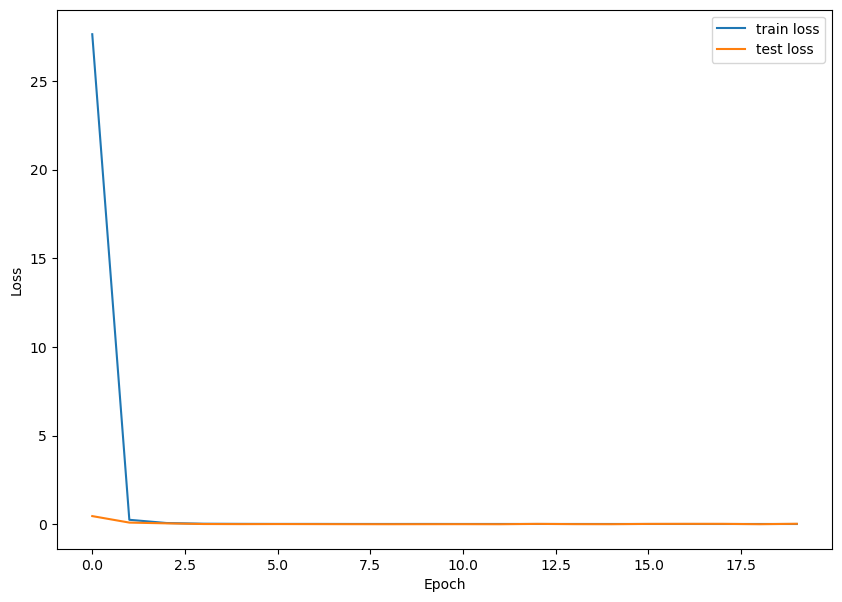

In [77]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029


[0.0029178012628108263, 0.0029178012628108263]